## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [72]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [73]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [94]:
# 找到換行符號，用該符號做字串分割後，把它拿掉

import re
arranged_data = re.split('\t|\n', data)

# split_tag = '\n'
# arranged_data = data.split(split_tag)

arranged_data.pop(-1)
print(len(arranged_data))
print(arranged_data[0:6])
print(arranged_data[-7:-1])
arranged_data[-1]

19990
['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg', 'n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg', 'n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']
['http://farm2.static.flickr.com/1130/960179413_0002e006f0.jpg?v=0', 'n00433802_5204', 'http://static.flickr.com/150/387324732_f8149d0c65.jpg', 'n00433802_5208', 'http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHaybXI/AAAAAAAAAwY/VuzoyOGFARQ/s400/Eleni-Andriola-of-Greece4.jpg', 'n00433802_5211']


'http://www.loudoungymnastics.com/images/Girls_doing_split%20jpg.jpg'

## 將 txt 轉成 pandas dataframe

In [107]:
import pandas as pd

    
# df = pd.DataFrame(arranged_data, columns=['index', 'url'])
df = pd.DataFrame(arranged_data[1::2], index=arranged_data[::2], columns=['url'])
df.head()

,url
n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

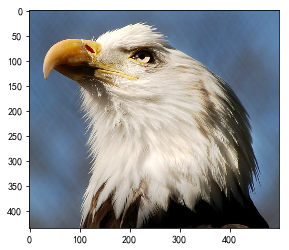

In [108]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.iloc[0,0]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [127]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    from PIL import Image
    from io import BytesIO
    import numpy as np
    
    import scipy.io as sio

    import requests
    
    img_list = []
    
    for url_link in url_list:
        print(url_link)
        response = requests.get(url_link)
        img1 = Image.open(BytesIO(response.content))
        sio.savemat(file_name='data/examples/example.mat', mdict={'img': img1})

        mat_arr = sio.loadmat('data/examples/example.mat')
        img_list.extend(mat_arr)

        
    return img_list

In [118]:
df.iloc[0:5,0].values

array(['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg',
       'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg',
       'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg',
       'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg',
       'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'],
      dtype=object)

In [128]:
result = img2arr_fromURLs(df.iloc[0:5,0].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


TypeError: Could not convert None (type <class 'NoneType'>) to array

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


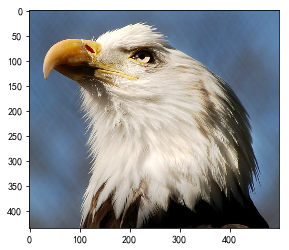

http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg


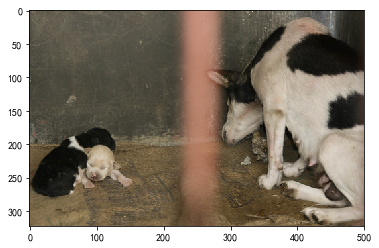

http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg


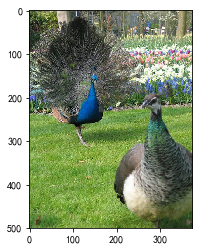

http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg


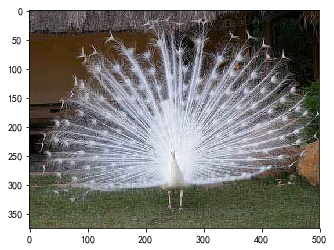

In [144]:
from PIL import Image
from io import BytesIO
import numpy as np
    
import scipy.io as sio

import requests

import cv2


for url_link in df.iloc[0:4,0].values:
    print(url_link)
    response = requests.get(url_link)
    img3 = Image.open(BytesIO(response.content))
    plt.imshow(img3)
    plt.show()
